<h1><b><Center>BFS


In [2]:
import networkx as nx
from collections import deque

['A', 'C', 'F']


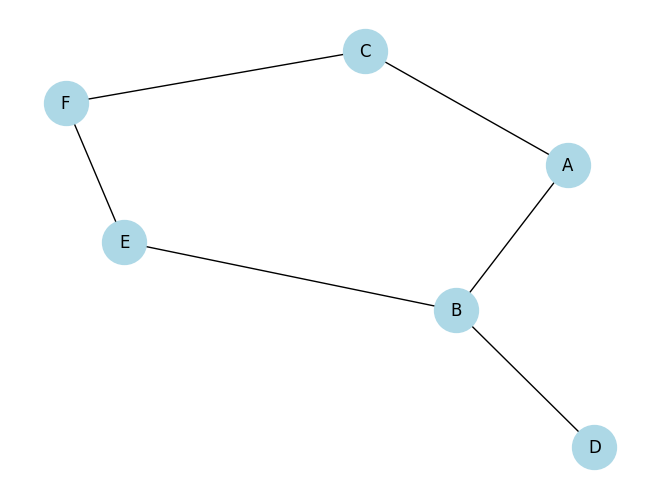

In [13]:
G=nx.Graph()
G.add_edges_from([['A','B'],['A','C'],['B','D'],['B','E'],['C','F'],['F','E']])

start = 'A'
goal = 'F'

def BFS(graph,start,goal):
    visited = set()
    queue = deque()
    queue.append((start,[start]))

    while queue:
        node,path = queue.popleft()
        if node == goal:
            return path 
        visited.add(node)

        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor,path+[neighbor]))
    


print(BFS(G,start,goal))
nx.draw(G,with_labels=True,node_size=1000,node_color='lightblue')

<h1><b><Center>DFS

['A', 'B', 'E', 'F']


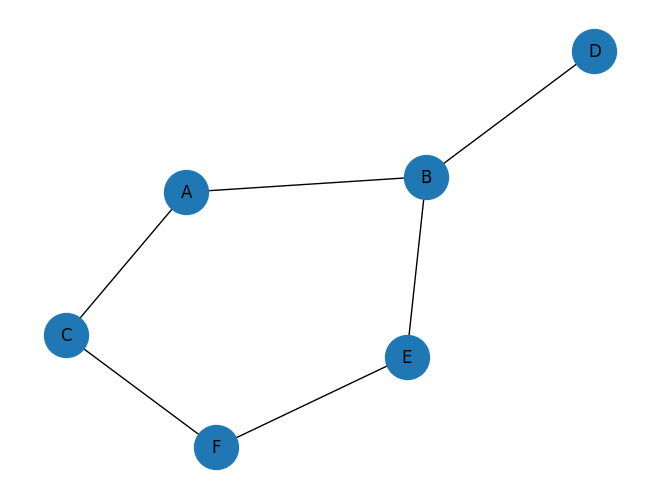

In [6]:
def DFS(Graph,start,goal):
    visited = set()
    def dfs_rec(node,path):
        if node == goal:
            return path 
        visited.add(node)
        for neighbor in Graph.neighbors(node):
            if neighbor not in visited:
               new_path =  dfs_rec(neighbor,path+[neighbor])
               if new_path:
                   return new_path
    return dfs_rec(start,[start])

G=nx.Graph()
G.add_edges_from([['A','B'],['A','C'],['B','D'],['B','E'],['C','F'],['F','E']])

start = 'A'
goal = 'F'

print(DFS(G,start,goal))
nx.draw(G,with_labels=True,node_size=1000)

<h1><b><Center>BEST FIRST

['A', 'B', 'E']
{'A': 0.8147458140982332, 'B': 0.6590157176669243, 'C': 0.940735334783377, 'D': 1.1755436335117075, 'E': 0.0, 'F': 0.6959544496399088}


{('A', 'B'): Text(0.2205564666663642, 0.14776636517971853, '9'),
 ('A', 'C'): Text(0.2818300825689656, -0.37804212096966133, '8'),
 ('B', 'D'): Text(0.14548520024179745, 0.7021895673814109, '7'),
 ('B', 'E'): Text(-0.18143953125653706, 0.21372334364872203, '6'),
 ('C', 'F'): Text(-0.09728663869534415, -0.6593019031943372, '5'),
 ('E', 'F'): Text(-0.42731568948553894, -0.3241577782257511, '4')}

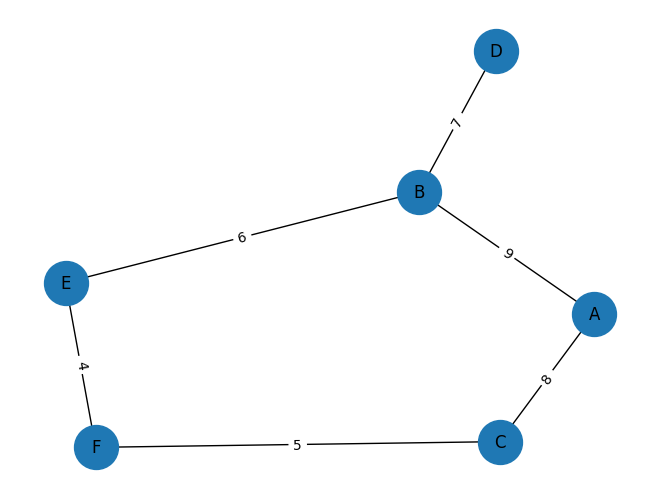

In [23]:
import math 
import networkx as nx
import queue
def edis(pos,node,goal):
    x,y = pos[node]
    x2,y2=pos[goal]
    return math.sqrt((x2-x)**2+(y2-y)**2)

G = nx.Graph()
G.add_weighted_edges_from([['A','B',9],['A','C',8],['B','D',7],['B','E',6],['C','F',5],['F','E',4]])
pos = nx.spring_layout(G)
start= 'A'
goal = 'E'
herustic = {node : edis(pos,node,goal) for node in G.nodes()}

def calculatecost(path,graph):
    cost=0
    for n in range(len(path)-1):
        cost+=graph[path[n]][path[n+1]]['weight']
    return cost

def bfs(graph,start,gaol):
    visited = set()
    que = queue.PriorityQueue()
    que.put((0,[start]))

    while not que.empty():
        cost,path = que.get()
        if path[-1] == goal:
            return path 
        visited.add(path[-1])
        for n in graph.neighbors(path[-1]):
            if n not in visited:
                que.put((calculatecost(path+[n],graph)+herustic[n],path+[n]))

print(bfs(G,start,goal))
print(herustic)
edge_label = nx.get_edge_attributes(G,"weight")
nx.draw(G,with_labels=True,node_size=1000,pos=pos)
nx.draw_networkx_edge_labels(G,edge_labels=edge_label,pos=pos)

<h1><b><Center>KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
data = pd.DataFrame({"Size": [7.0, 7.5, 6.8, 6.5, 7.8, 5.5, 5.2, 5.0, 5.1, 5.6]})
data["Weight"]=[150, 170, 140, 130, 180, 110, 105, 95, 100, 115]
data["labels"]=labels = ["Apple", "Apple", "Apple", "Apple", "Apple",
          "Orange", "Orange", "Orange", "Orange", "Orange"]
data["labels"]=data["labels"].map({"Apple":0,"Orange":1})
data

,Size,Weight,labels
0,7.0,150,0
1,7.5,170,0
2,6.8,140,0
3,6.5,130,0
4,7.8,180,0
5,5.5,110,1
6,5.2,105,1
7,5.0,95,1
8,5.1,100,1
9,5.6,115,1


In [75]:
x=data[["Size","Weight"]]
y=data["labels"]
y

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: labels, dtype: int64

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
test = pd.DataFrame([[7.0,10]])

In [79]:
y_predict = knn.predict(x_test)

In [83]:
knn.score(x_test,y_test)

1.0

<h1><b><center>Kmeans


In [91]:
from sklearn.cluster import KMeans
import pandas as pd

In [101]:
data = pd.DataFrame({"Size": [7.0, 7.5, 6.8, 6.5, 7.8, 5.5, 5.2, 5.0, 5.1, 5.6]})
data["Weight"]=[150, 170, 140, 130, 180, 110, 105, 95, 100, 115]
data["labels"]=labels = ["Apple", "Apple", "Apple", "Apple", "Apple",
          "Orange", "Orange", "Orange", "Orange", "Orange"]
data["labels"]=data["labels"].map({"Apple":1,"Orange":0})

In [121]:
k = KMeans(n_clusters=2)
temp=k.fit_predict(data)
temp

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [122]:
k.inertia_

1773.8025

<h1><b><Center>Linear Regression

In [126]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [142]:
data = pd.DataFrame({"Size": [7.0, 7.5, 6.8, 6.5, 7.8, 5.5, 5.2, 5.0, 5.1, 5.6]})
data["Weight"]=[150, 170, 140, 130, 180, 110, 105, 95, 100, 115]
x= data["Size"].values.reshape(-1,1)
y=data["Weight"].values.reshape(-1,1)

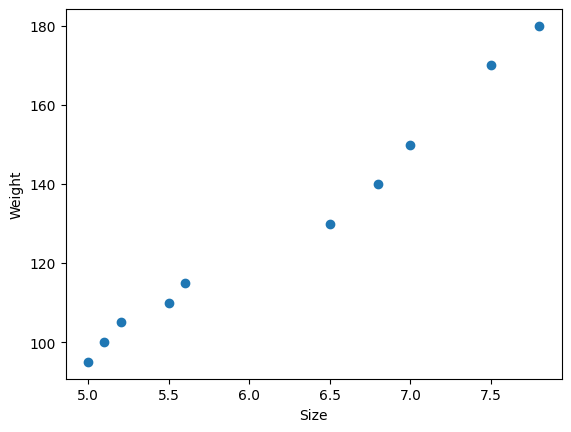

In [136]:

plt.scatter(x,y)
plt.xlabel("Size")
plt.ylabel("Weight")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

array([[5.5],
       [7. ],
       [5. ],
       [6.8],
       [5.6],
       [7.8],
       [6.5],
       [5.2]])

In [147]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [155]:
y_predict = lr.predict(x_test)
y_predict
y_test

array([[100],
       [170]])

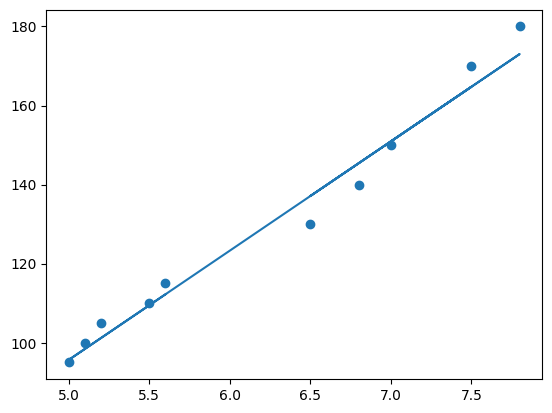

In [160]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x))

In [161]:
lr.coef_

array([[27.63157895]])

In [162]:
lr.intercept_

array([-42.5])

<h1><b><Center>Linear regression from Scratch

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.DataFrame({"Size": [7.0, 7.5, 6.8, 6.5, 7.8, 5.5, 5.2, 5.0, 5.1, 5.6]})
data["Weight"]=[150, 170, 140, 130, 180, 110, 105, 95, 100, 115]
x_data = data["Size"]
y_data=data["Weight"]
x, x_test, y, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=42)

x_mean = x.mean()
y_mean = y.mean()
y

In [28]:
def caculate_m():
    sigma = len(x)
    m=0
    demnoinator = 0
    for i in x:
        demnoinator+=(i-x_mean)**2
    for i,j in zip(x,y):
        m+=(i-x_mean)*(j-y_mean)
    return m/ demnoinator

m=caculate_m()
m

np.float64(27.63157894736842)

In [180]:
b = y_mean - m*x_mean
b

np.float64(-45.03252032520322)

<h1><b><Center>Linear Regression from Scrarthc SGD

In [1]:
import random

# Sample dataset: y = 2x + 3 (with a bit of noise)
data = [(x, 2 * x + 3 + random.uniform(-1, 1)) for x in range(10)]

# Hyperparameters
learning_rate = 0.01
epochs = 100

# Initialize m and b
m = 0
b = 0

# SGD loop
for epoch in range(epochs):
    total_loss = 0
    for x, y in data:
        # Predicted value
        y_pred = m * x + b

        # Error
        error = y - y_pred

        # Gradients
        dm = -2 * x * error
        db = -2 * error

        # Update m and b
        m = m - learning_rate * dm
        b = b - learning_rate * db

        # Track loss
        total_loss += error ** 2

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss:.4f}, m = {m:.4f}, b = {b:.4f}")

print("\nFinal values:")
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Epoch 0: Loss = 230.9099, m = 2.1991, b = 0.7468
Epoch 10: Loss = 9.5186, m = 2.0943, b = 1.7384
Epoch 20: Loss = 6.1726, m = 2.0327, b = 2.3214
Epoch 30: Loss = 5.1548, m = 1.9965, b = 2.6641
Epoch 40: Loss = 4.8846, m = 1.9752, b = 2.8655
Epoch 50: Loss = 4.8391, m = 1.9627, b = 2.9839
Epoch 60: Loss = 4.8515, m = 1.9554, b = 3.0536
Epoch 70: Loss = 4.8724, m = 1.9510, b = 3.0945
Epoch 80: Loss = 4.8893, m = 1.9485, b = 3.1185
Epoch 90: Loss = 4.9009, m = 1.9470, b = 3.1327

Final values:
Slope (m): 1.9461967563551004
Intercept (b): 3.140357589885403


<h1><b><Center>Artifical Neural Network

In [53]:
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
data = {
    'Hours_Study': [2, 4, 5, 3, 8, 9, 1, 6, 7, 10],
    'Hours_Sleep': [7, 6, 5, 8, 5, 6, 9, 4, 3, 2],
    'Passed':      [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
}

In [43]:
dataset = pd.DataFrame(data)
x = dataset[["Hours_Study","Hours_Sleep"]]
y = dataset["Passed"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train

,Hours_Study,Hours_Sleep
5,9,6
0,2,7
7,6,4
2,5,5
9,10,2
4,8,5
3,3,8
6,1,9


In [55]:
p = Perceptron(eta0=0.1,max_iter=100)


In [56]:
p.fit(x_train,y_train)

Perceptron(eta0=0.1, max_iter=100)

In [57]:
y_predict=p.predict(x_test)

In [58]:
accuracy_score(y_pred=y_predict,y_true=y_test)

0.5

<h1><b><Center>ANN with Keras

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split

In [1]:
data = {
    'Hours_Study': [2, 4, 5, 3, 8, 9, 1, 6, 7, 10],
    'Hours_Sleep': [7, 6, 5, 8, 5, 6, 9, 4, 3, 2],
    'Passed':      [0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
    'Passed1': [0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
}

In [3]:
dataset = pd.DataFrame(data)
x = dataset[["Hours_Study","Hours_Sleep"]]
y = dataset[["Passed","Passed1"]]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
p = Sequential()
p.add(Dense(2,input_dim=2,activation="sigmoid"))
p.add(Dense(2, activation="sigmoid"))  # Output layer for binary classification

/home/mustafa/jupyter-venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-13 10:39:05.182252: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
p.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [9]:
p.fit(x_train,y_train,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step - accuracy: 1.0000 - loss: 0.2744
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.2743
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.2741
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.2740
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.2739
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.2737
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.2736
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.2734
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.2733
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.2731


In [29]:
test = pd.DataFrame([[2,7]])
test

,0,1
0,2,7


In [33]:
y_pred = p.predict(test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.61237484, 0.26950726]], dtype=float32)

In [104]:
loss,accuracy = p.evaluate(x,y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4000 - loss: 0.3074


0.4000000059604645

<h1><b><Center>ANN FROM SCRATCH

In [105]:
import pandas as pd

In [106]:
dataset= {
    'Hours_Study': [2, 4, 5, 3, 8, 9, 1, 6, 7, 10],
    'Hours_Sleep': [7, 6, 5, 8, 5, 6, 9, 4, 3, 2],
    'Passed':      [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
}

In [107]:
data = pd.DataFrame(dataset)

In [111]:
x = data[["Hours_Study","Hours_Sleep"]]
y = data["Passed"]
weights = [range(1,11)]*2

In [4]:
def perceptron(input,weights,bais):
    activation=0
    for i in range(len(input)):
        actiavtion+=input[i]*weights[i]
    return actiavtion+bais
    


<h1><b><Center>ANN FROM SCRATCH

In [ ]:
# ------------------------------------------
# Perceptron Predict Function
def predict(row, weights):
    activation = weights[0]  # bias
    for i in range(len(row)-1):  # exclude the label
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# ------------------------------------------
# Perceptron Train Function
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for _ in range(len(train[0]))]  # one weight per feature + bias
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error ** 2
            weights[0] += l_rate * error  # bias update
            for i in range(len(row)-1):  # update weights
                weights[i + 1] += l_rate * error * row[i]
        print(f"epoch={epoch}, lrate={l_rate:.3f}, error={sum_error:.3f}")
    return weights

# ------------------------------------------
# Train the model
weights = train_weights(x_train, l_rate=0.1, n_epoch=20)

# ------------------------------------------
# Test the model
y_true = []
y_pred = []

for row in x_test:
    prediction = predict(row, weights)
    y_pred.append(prediction)
    y_true.append(row[-1])

# ------------------------------------------
# Evaluate the results
print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")

<h1><b><Center>Perceptron

In [1]:
import pandas as pd

In [2]:
feature_1 = [2, 1, 3, 2, 1, 3, 4, 1, 2, 3]
feature_2 = [3, 2, 1, 1, 1, 3, 2, 3, 2, 2]
labels = [1, 1, 1, 0, 0, 1, 1, 0, 0, 1]


In [3]:
data = pd.DataFrame({"F1": feature_1,"F2":feature_2,"labels":labels})

In [44]:
x = data[["F1","F2"]]
y = data["labels"]
weights=[0,0]
bais=0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

F1
F2


In [60]:
def predict(input_row, weights, bias):
    activation = bias
    # Iterate over input and corresponding weights
    for i, w in zip(input_row, weights):
        activation += (i * w)  # element-wise multiplication

    return 1 if activation > 0 else 0  # activation > 0 for classification


In [64]:
def updateWeight(x_train,y_train,epoceh,lr):
    global bais
    for i in range(epoceh):
        sum_error = 0
        for i in range(len(x_train)):
            y_pred=predict(x_train.iloc[0],weights,bais)
            error =y_train.iloc[i] - y_pred
            sum_error+=error
            bais+=lr*sum_error
            for j in range(len(weights)):
                weights[j] += lr * error * x_train.iloc[i].iloc[j]  # update each weight


updateWeight(x_train,y_train,10,0.5)

y_pred = []
for test in range(len(x_train)):
    y_pred.append(predict(x_train.iloc[test],weights,bais))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_train))


0.875


In [88]:
weights

[np.float64(138.0), np.float64(-63.5)]